# samples analysis

In [1]:
import sys,os
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pylab as py
import pandas as pd
from tools.tools import load,save,checkdir
from tools.config import load_config,conf
from fitlab.resman import RESMAN
#from maxlike import ML
import lhapdf
%matplotlib inline
import warnings
def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()
warnings.filterwarnings('ignore')
import copy

In [2]:
path='mcdata09'

In [3]:
runs=load('%s/summary.mcp'%path)

In [4]:
load_config('%s/input.py'%path)
conf['resman']=RESMAN(mode='solo',ip=None,nworkers=None)

loading dis data sets 10016
loading dis data sets 10017
loading dis data sets 10020
loading dis data sets 10021
loading dis data sets 10010
loading dis data sets 10011
dis-precalc:  T2-f22
dis-precalc:  T2-fL2
dis-precalc:  T2-fLL
dis-precalc:  T2-fLL


In [5]:
res=conf['resman'].get_residuals(conf['parman'].par)

In [6]:
res[0].size

1495

In [7]:
runs['all'].keys()

['nap', 'weights', 'nll', 'samples']

In [8]:
print runs.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'all']


In [9]:
len(runs['all']['samples'])

23334

## study all the samples

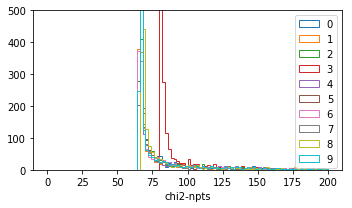

In [10]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*5,nrows*3))

ax=py.subplot(nrows,ncols,1)
for k in runs:
    if k=='all': continue
    ax.hist(2*runs[k]['nll']-res[0].size,bins=100,range=(0,200),histtype='step',label=str(k));
ax.legend()
ax.set_ylim(0,500)
ax.set_xlabel('chi2-npts')
#ax.semilogx()
py.tight_layout()

In [11]:
tabs={}
for k in runs:
    tab={}
    tab['nll']=runs[k]['nll']
    tab['weights']=runs[k]['weights']
    samples=np.transpose(runs[k]['samples'])
    for i in range(len(conf['parman'].order)):
        _,kind,par=conf['parman'].order[i]
        #print par
        tab['%s-%s'%(kind,str(par))]=samples[i]
    tabs[k]=pd.DataFrame(tab)

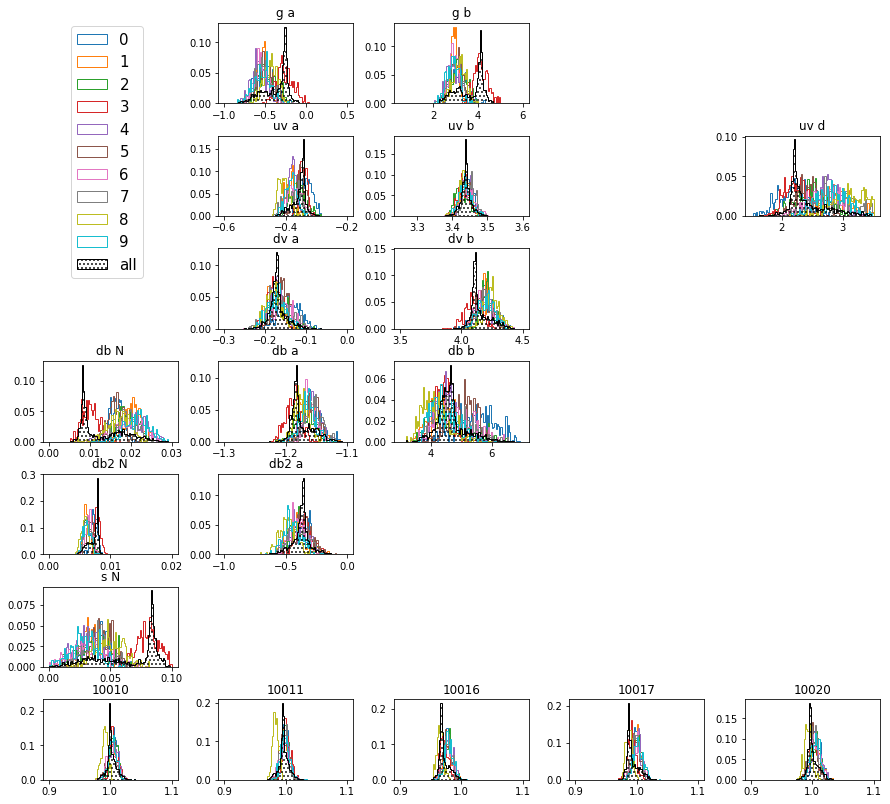

In [12]:
nrows,ncols=8,5
fig = py.figure(figsize=(ncols*3,nrows*2))


global cnt
cnt=0
def plot(tags):
    global cnt
    for i in range(len(tags)):
        cnt+=1
        if tags[i]==None: continue
        ax=py.subplot(nrows,ncols,cnt)
        kind,par=tags[i].split('-')
        if kind=='pdf': 
            vmin=conf['params']['pdf'][par]['min']
            vmax=conf['params']['pdf'][par]['max']
            R=(vmin,vmax)
        elif kind=='dis':
            vmin=conf['datasets']['dis']['norm'][int(par)]['min']
            vmax=conf['datasets']['dis']['norm'][int(par)]['max']
            R=(vmin,vmax)

        for k in tabs:
            if k=='all': continue
            tab=tabs[k]
            ax.hist(tab[tags[i]],range=R,bins=100,weights=tab['weights'],histtype='step',label=str(k))
        ax.hist(tabs['all'][tags[i]],range=R,bins=100,\
                edgecolor='k',hatch='...',\
                weights=tabs['all']['weights'],histtype='step',label=str(k))
        ax.set_title(par)
        if cnt==2: ax.legend(bbox_to_anchor=(-0.5, 1.05),fontsize=15)
    
plot([None,'pdf-g a','pdf-g b',None,None])
plot([None,'pdf-uv a','pdf-uv b',None,'pdf-uv d'])
plot([None,'pdf-dv a','pdf-dv b',None,None])
plot(['pdf-db N','pdf-db a','pdf-db b',None,None])
plot(['pdf-db2 N','pdf-db2 a',None,None,None])
plot(['pdf-s N',None,None,None,None])
plot(['dis-10010','dis-10011','dis-10016','dis-10017','dis-10020',])

py.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)


## analyze results aveger runs veto and cdf cut

In [13]:
runs=load('%s/summary-veto-3.mcp'%path)

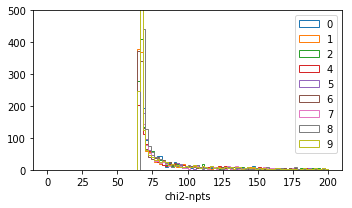

In [14]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*5,nrows*3))

ax=py.subplot(nrows,ncols,1)
for k in runs:
    if k=='all': continue
    ax.hist(2*runs[k]['nll']-res[0].size,bins=100,range=(0,200),histtype='step',label=str(k));
ax.legend()
ax.set_xlabel('chi2-npts')
ax.set_ylim(0,500)
#ax.semilogx()
py.tight_layout()

In [15]:
tabs={}
for k in runs:
    tab={}
    tab['nll']=runs[k]['nll']
    tab['weights']=runs[k]['weights']
    samples=np.transpose(runs[k]['samples'])
    for i in range(len(conf['parman'].order)):
        _,kind,par=conf['parman'].order[i]
        #print par
        tab['%s-%s'%(kind,str(par))]=samples[i]
    tabs[k]=pd.DataFrame(tab)

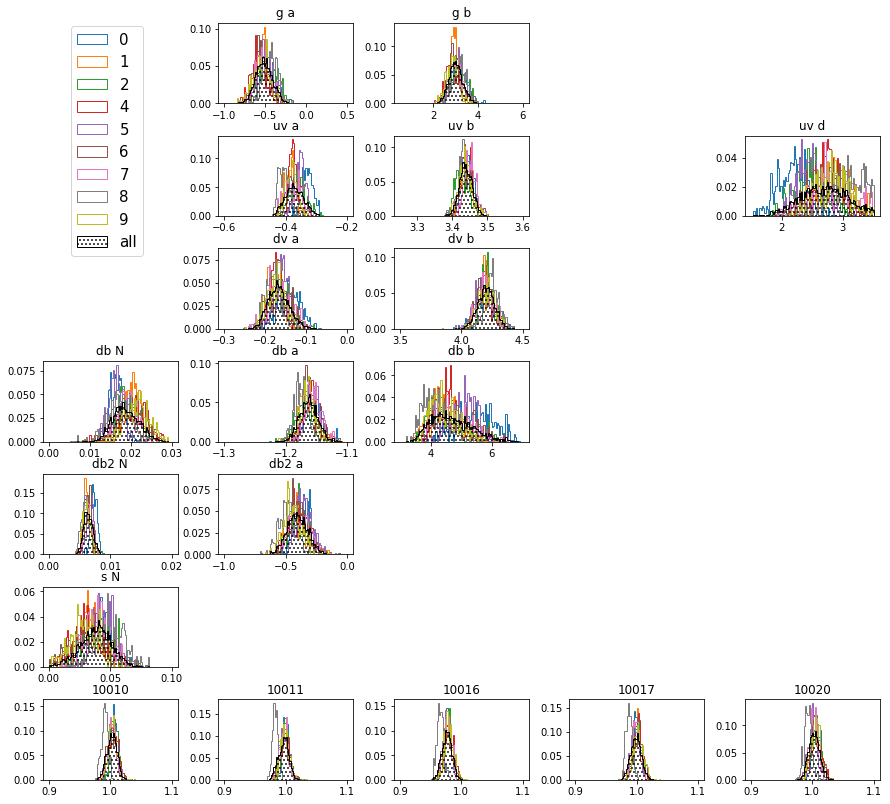

In [16]:
nrows,ncols=8,5
fig = py.figure(figsize=(ncols*3,nrows*2))

global cnt
cnt=0
def plot(tags):
    global cnt
    for i in range(len(tags)):
        cnt+=1
        if tags[i]==None: continue
        ax=py.subplot(nrows,ncols,cnt)
        kind,par=tags[i].split('-')
        if kind=='pdf': 
            vmin=conf['params']['pdf'][par]['min']
            vmax=conf['params']['pdf'][par]['max']
            R=(vmin,vmax)
        elif kind=='dis':
            vmin=conf['datasets']['dis']['norm'][int(par)]['min']
            vmax=conf['datasets']['dis']['norm'][int(par)]['max']
            R=(vmin,vmax)

        for k in tabs:
            if k=='all': continue
            tab=tabs[k]
            ax.hist(tab[tags[i]],range=R,bins=100,weights=tab['weights'],histtype='step',label=str(k))
        ax.hist(tabs['all'][tags[i]],range=R,bins=100,\
                edgecolor='k',hatch='...',\
                weights=tabs['all']['weights'],histtype='step',label=str(k))
        ax.set_title(par)
        if cnt==2: ax.legend(bbox_to_anchor=(-0.5, 1.05),fontsize=15)
    
plot([None,'pdf-g a','pdf-g b',None,None])
plot([None,'pdf-uv a','pdf-uv b',None,'pdf-uv d'])
plot([None,'pdf-dv a','pdf-dv b',None,None])
plot(['pdf-db N','pdf-db a','pdf-db b',None,None])
plot(['pdf-db2 N','pdf-db2 a',None,None,None])
plot(['pdf-s N',None,None,None,None])
plot(['dis-10010','dis-10011','dis-10016','dis-10017','dis-10020',])

py.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)

# reduce number of samples based on cdfcut

In [18]:
cdfcut=0.001
weights=np.sort(runs['all']['weights'])
cdf0=[]
for i in range(weights.size):
    cdf0.append(np.sum(weights[:i+1]))
cdf=[cdf0[i]  for i in range(weights.size)  if cdf0[i]>cdfcut]
idx=[i  for i in range(weights.size)  if cdf0[i]>cdfcut]

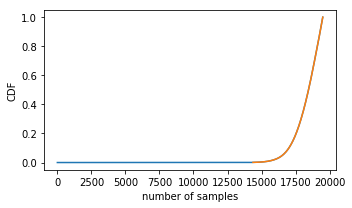

In [19]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*5,nrows*3))

ax=py.subplot(nrows,ncols,1)
ax.plot(range(len(cdf0)),cdf0)
ax.plot(idx,cdf)

ax.set_ylabel('CDF')
ax.set_xlabel('number of samples')
py.tight_layout()

In [20]:
final=load('%s/final.mcp'%path)
print len(final['samples'])

5129


In [21]:
tab={}
tab['weights']=final['weights']
samples=np.transpose(final['samples'])
for i in range(len(conf['parman'].order)):
    _,kind,par=conf['parman'].order[i]
    #print par
    tab['%s-%s'%(kind,str(par))]=samples[i]
tab=pd.DataFrame(tab)

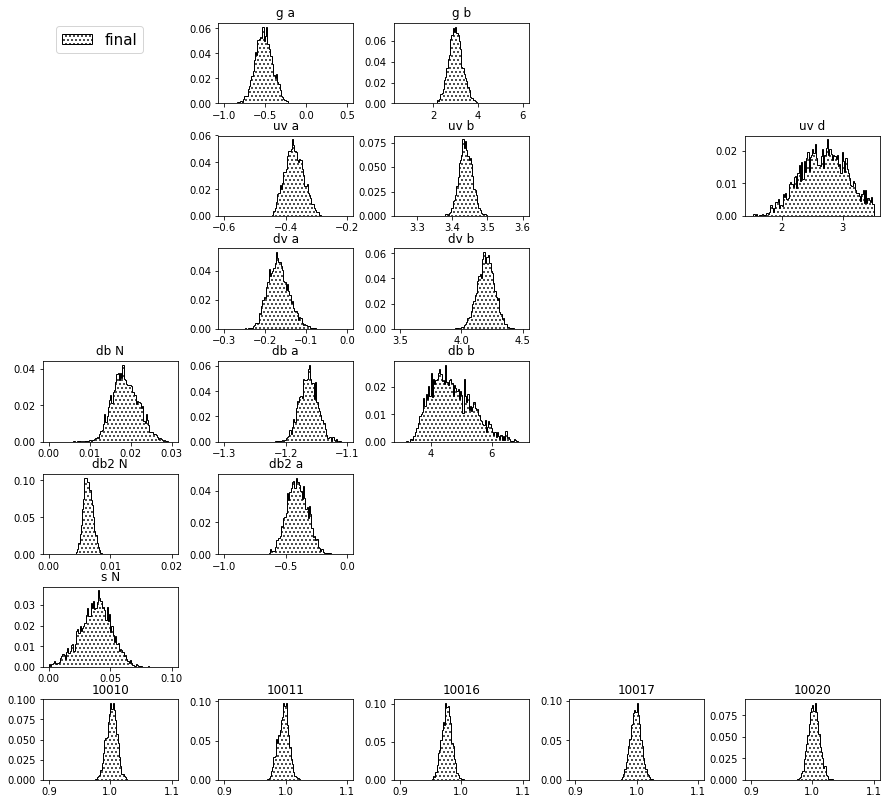

In [22]:
nrows,ncols=8,5
fig = py.figure(figsize=(ncols*3,nrows*2))

global cnt
cnt=0
def plot(tags):
    global cnt
    for i in range(len(tags)):
        cnt+=1
        if tags[i]==None: continue
        ax=py.subplot(nrows,ncols,cnt)
        kind,par=tags[i].split('-')
        if kind=='pdf': 
            vmin=conf['params']['pdf'][par]['min']
            vmax=conf['params']['pdf'][par]['max']
            R=(vmin,vmax)
        elif kind=='dis':
            vmin=conf['datasets']['dis']['norm'][int(par)]['min']
            vmax=conf['datasets']['dis']['norm'][int(par)]['max']
            R=(vmin,vmax)

        ax.hist(tab[tags[i]],range=R,bins=100,\
                edgecolor='k',hatch='...',\
                weights=tab['weights'],histtype='step',label='final')
        ax.set_title(par)
        if cnt==2: ax.legend(bbox_to_anchor=(-0.5, 1.05),fontsize=15)
    
plot([None,'pdf-g a','pdf-g b',None,None])
plot([None,'pdf-uv a','pdf-uv b',None,'pdf-uv d'])
plot([None,'pdf-dv a','pdf-dv b',None,None])
plot(['pdf-db N','pdf-db a','pdf-db b',None,None])
plot(['pdf-db2 N','pdf-db2 a',None,None,None])
plot(['pdf-s N',None,None,None,None])
plot(['dis-10010','dis-10011','dis-10016','dis-10017','dis-10020',])

py.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)